In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Import cell features csv file 

#file_path = "/home/bmaljaibaji/cell_types_specimen_details_mouse.csv"
#data = pd.read_csv(file_path)

cell_features_df = pd.read_csv('cell_types_specimen_details.csv')

# Figure out size and the columns of our data
print(f"Dataset Shape: {data.shape}")
print("Available Columns:", data.columns)

Dataset Shape: (2333, 54)
Available Columns: Index(['line_name', 'specimen__id', 'specimen__name', 'specimen__hemisphere',
       'structure__id', 'structure__name', 'structure__acronym',
       'structure_parent__id', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendr

In [ ]:
#Cleaning data into human - MTG - epilepsy - L4/L5 layers
humancell_df = cell_features_df[cell_features_df['donor__species']=='Homo Sapiens']
human_MTG_data = humancell_df[humancell_df['structure__acronym']=='MTG']
epihumancell_df = human_MTG_data[human_MTG_data['donor__disease_state']== 'epilepsy']
epihumanL4_df = epihumancell_df[epihumancell_df['structure__layer']=='4']
epihumanL5_df = epihumancell_df[epihumancell_df['structure__layer']=='5']


In [ ]:
#
ephys_columns = [ 'ef__fast_trough_v_long_square','ef__upstroke_downstroke_ratio_long_square', 
                 'ef__adaptation', 'ef__f_i_curve_slope','ef__threshold_i_long_square', 'ef__tau',
                 'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp', 'ef__vrest']

morph_columns = ['nr__max_euclidean_distance', 'nr__number_stems', 'nr__number_bifurcations',
    'nr__average_contraction', 'nr__average_parent_daughter_ratio']

# Only keep the electrophysiology columns that are in the cell features data
ephys_columns_filtered = [col for col in ephys_columns if col in data.columns]

# Drop all null values within our columns of interest
human_L4_ephys = epihumanL4_df[ephys_columns_filtered].dropna()
human_L5_ephys = epihumanL5_df[ephys_columns_filtered].dropna()


In [17]:
# Function to calculate statistics of cell features (mean, std, etc.) and save them to an array 
def compute_stats(data):
    if data.empty:
        return np.full((8, len(ephys_columns_filtered)), np.nan)
    
    return np.array([
        np.count_nonzero(~np.isnan(data), axis=0),
        np.nanmean(data, axis=0),
        np.nanstd(data, axis=0),
        np.nanmin(data, axis=0),
        np.nanpercentile(data, 25, axis=0),
        np.nanpercentile(data, 50, axis=0),
        np.nanpercentile(data, 75, axis=0),
        np.nanmax(data, axis=0)
    ])

# Apply the function on our specified columns
human_L4_stats = compute_stats(human_L4_ephys)
human_L5_stats = compute_stats(human_L5_ephys)
#mouse_L4_stats = compute_stats(mouse_L4_ephys)
#mouse_L5_stats = compute_stats(mouse_L5_ephys)

# Assign label names
stats_labels = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Create dataframes of L4 and L5 for each species, with indexes being the statistical labels,
# and columns being those that we filtered out earlier 
human_L4_stats_df = pd.DataFrame(human_L4_stats, index=stats_labels, columns=ephys_columns_filtered)
human_L5_stats_df = pd.DataFrame(human_L5_stats, index=stats_labels, columns=ephys_columns_filtered)
#mouse_L4_stats_df = pd.DataFrame(mouse_L4_stats, index=stats_labels, columns=ephys_columns_filtered)
#mouse_L5_stats_df = pd.DataFrame(mouse_L5_stats, index=stats_labels, columns=ephys_columns_filtered)

# Show all 4 of our dataframes
print("\nHuman Layer 4 (L4) Neuron Statistics:")
display(human_L4_stats_df)

print("\nHuman Layer 5 (L5) Neuron Statistics:")
display(human_L5_stats_df)


Human Layer 4 (L4) Neuron Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Mean,620.625028,4.750000,19.500000,0.865274,0.955575,-54.739586,2.937191,0.059459,0.273537,60.000000,24.876942,72.272124,16.768631,233.350114,3.767662,-67.846862
Std,246.876643,0.721688,4.425306,0.028836,0.034214,5.131005,0.859995,0.046471,0.092700,23.804761,9.423177,33.589151,7.309560,97.308652,1.573521,2.942353
Min,288.950400,4.000000,11.000000,0.824509,0.905363,-65.406258,1.719542,0.006228,0.134441,30.000000,7.669349,28.206471,6.932729,77.499881,1.916387,-71.731476
25%,360.471578,4.000000,16.750000,0.838350,0.929557,-55.023440,2.378480,0.025287,0.185910,50.000000,18.565136,52.447763,12.168278,178.750053,3.001537,-70.590881
50%,641.293914,5.000000,19.500000,0.872207,0.950142,-53.640625,2.715369,0.053067,0.281407,50.000000,25.207951,60.111750,16.644256,220.859297,3.198570,-68.031982
75%,878.036723,5.000000,23.250000,0.891644,0.996796,-52.304688,3.309652,0.070873,0.337141,70.000000,32.718204,82.784773,19.077751,274.492197,4.239786,-65.772425
Max,962.801000,6.000000,26.000000,0.900537,1.000000,-46.687504,4.722566,0.189303,0.421007,130.000000,38.929509,144.243333,35.452858,438.750058,7.538280,-62.545727



Human Layer 5 (L5) Neuron Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
Mean,743.483316,5.315789,25.052632,0.867793,0.965015,-53.641449,3.310491,0.230601,0.170722,91.578947,28.270273,137.486576,10.408861,152.659808,5.066010,-68.345290
Std,373.336278,1.028675,9.127597,0.039446,0.036634,4.922062,0.873679,0.290655,0.102458,46.708858,10.819525,85.837972,6.595461,56.376800,1.943201,4.085842
Min,266.485184,3.000000,10.000000,0.764709,0.889893,-65.031250,1.364448,0.002328,0.052000,30.000000,7.919526,39.338333,2.712526,63.281059,2.448970,-73.533676
25%,392.752856,5.000000,19.500000,0.854065,0.937279,-54.109377,3.200292,0.034998,0.104927,60.000000,23.022232,90.173364,6.155443,101.484373,3.588290,-71.947098
50%,628.687486,5.000000,25.000000,0.880342,0.979105,-53.031250,3.418990,0.064593,0.141466,70.000000,28.297061,109.868000,9.101831,149.531245,4.287047,-69.308846
75%,1048.595817,6.000000,28.000000,0.892505,0.995252,-50.703127,3.880308,0.377845,0.191414,115.000000,35.644680,163.805000,11.096479,195.703097,6.187897,-66.304497
Max,1623.575309,7.000000,49.000000,0.925520,1.000000,-45.656254,4.559643,0.975859,0.483584,210.000000,50.025055,368.660000,25.420497,253.593743,8.867207,-59.723316


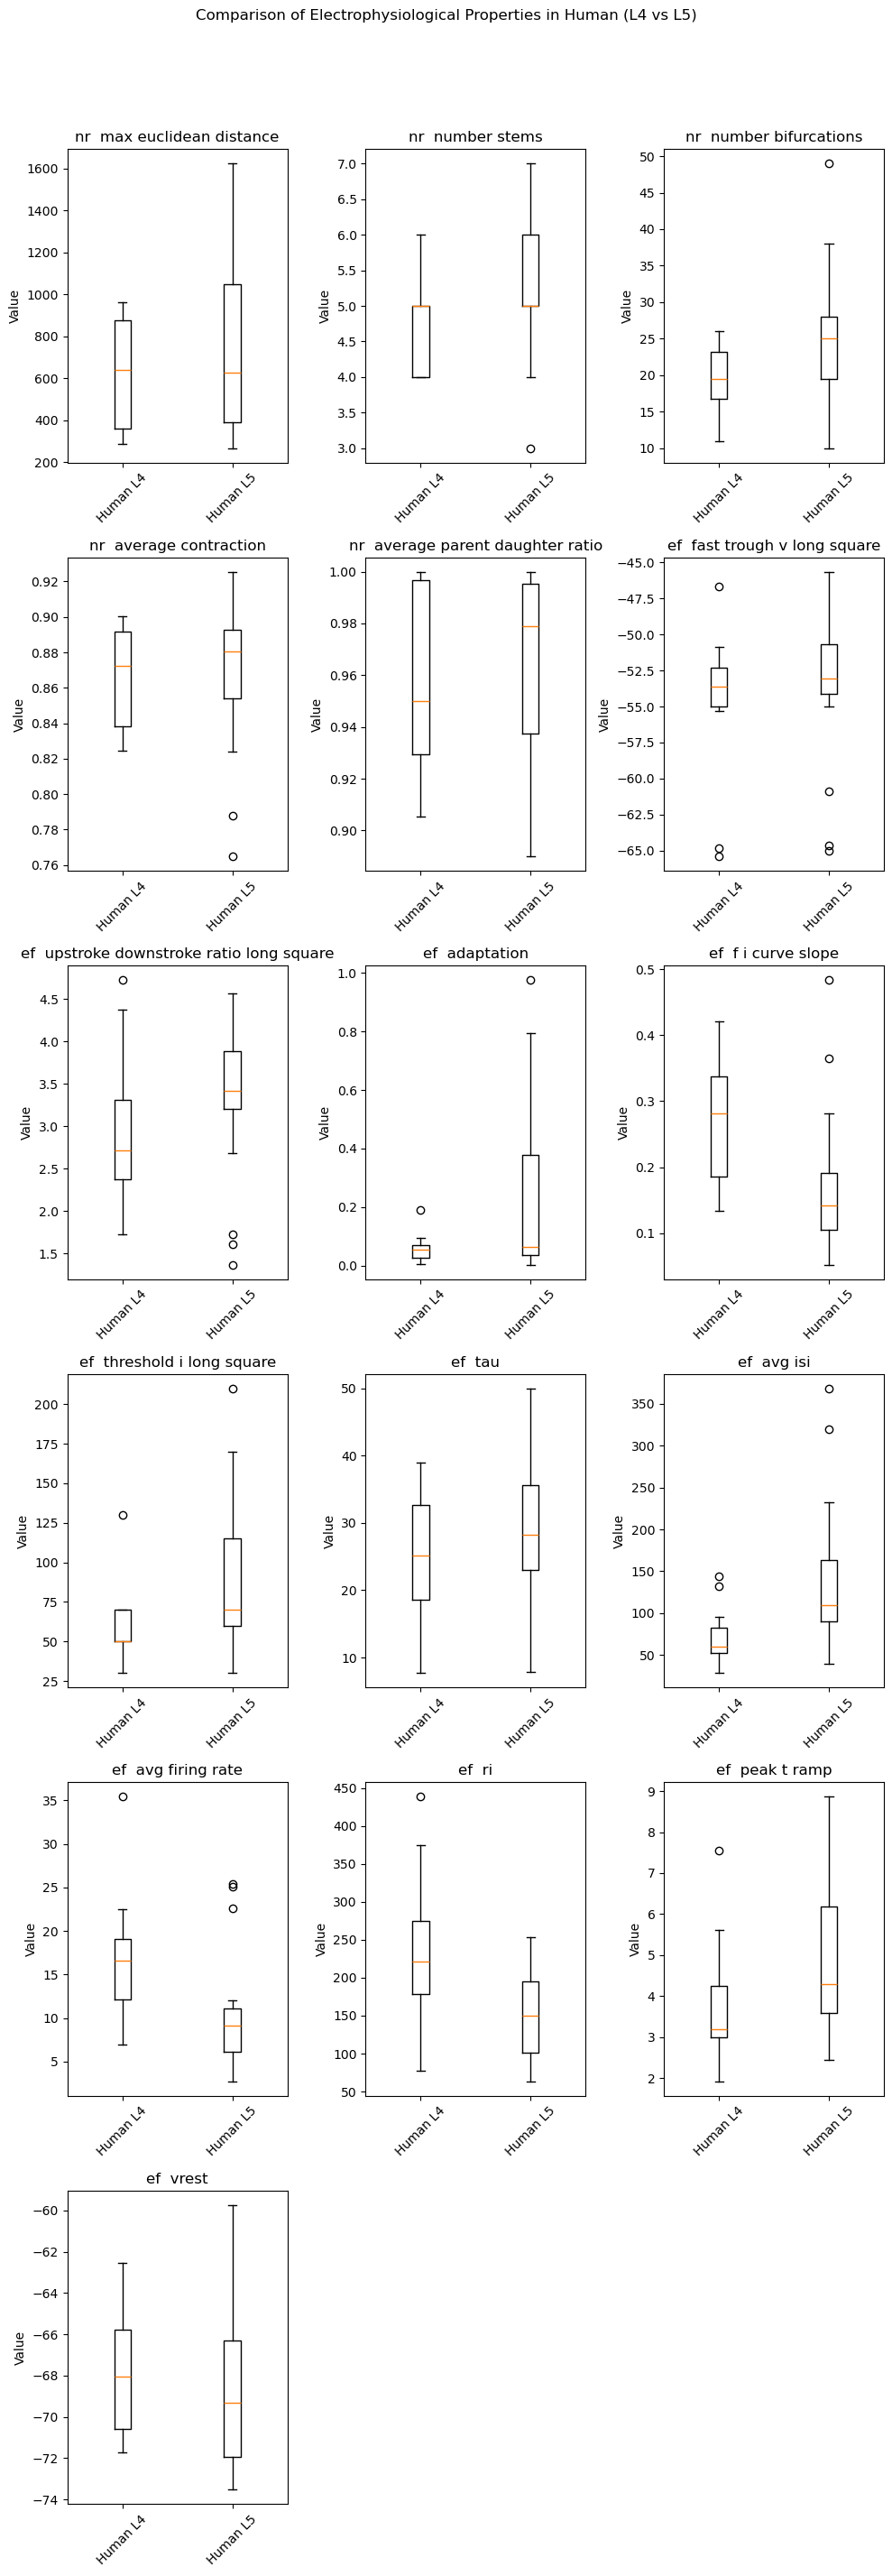

In [20]:
# Create a box plot comparing L4 and L5 between mouse and human
plt.figure(figsize=(10, 30))

# Make a for loop that runs through the first 6 features (columns), drops null values
#  and makes a boxplot
for i, col in enumerate(ephys_columns_filtered):  
    plt.subplot((len(ephys_columns_filtered) - 1) // 3 + 1, 3, i + 1)
    plt.boxplot([
        human_L4_ephys[col].dropna(), 
        human_L5_ephys[col].dropna()
    ], labels=['Human L4', 'Human L5'])
    
    plt.title(col.replace('_', ' '))
    plt.ylabel('Value')
    plt.xticks(rotation=45)

plt.suptitle("Comparison of Electrophysiological Properties in Human (L4 vs L5)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

After looking at all datas for each morphology measurements, we decide to look into the number of dendritic stems and the number of bifurcations to find out the different of neural morphology complexity between Layer 4 and Layer 5.

By looking at the datas, we decide to furthur look at the electrophysiology properties: f i curve slope, average interspike interval(ISI) and average firing rate. The average ISI is validated by the average firing rate.